# Example Template for HW3

This notebook contains the same template code as "logisticClassify2.py", but reorganized to make it simpler to edit and solve in iPython.  Feel free to use this for your homework, or do it another way, as you prefer.



In [1]:
from __future__ import division

import numpy as np
np.random.seed(0)

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

## Problem 1

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = ml.transforms.rescale(X)  # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2

### P1.1

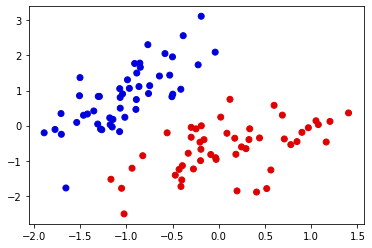

In [3]:
# Dataset A
ml.plotClassify2D(None, XA, YA)
plt.show()

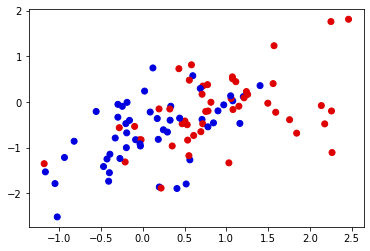

In [4]:
# Dataset B
ml.plotClassify2D(None, XB, YB)
plt.show()

After comparing the 2 graphs above, we can see clearly that dataset A is saparable while dataset B is not saparable.

### P1.2

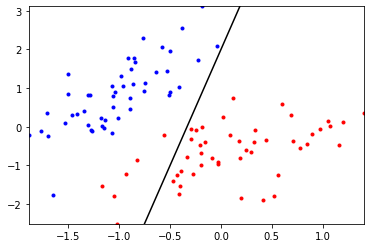

In [5]:
def myPlotBoundary(self, X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
    x2b = (self.theta[0]+self.theta[1]*x1b)/(-self.theta[2]);      # TODO find x2 values as a function of x1's values
    ## Now plot the data and the resulting boundary:
    A = Y==self.classes[0]; # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();


# Create a shell classifier
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = None                   # these functions will be implemented later
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2,6,-1]);  # TODO: insert hard-coded values
learnerA.plotBoundary(XA,YA)

plt.show()

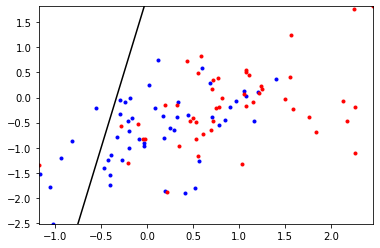

In [6]:
learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = np.array([2,6,-1]);  # TODO: insert hard-coded values
learnerB.plotBoundary(XB,YB)

plt.show()

### P1.3

In [7]:
# Should go in your logistic2 class:
def myPredict(self,X):
    """ Return the predictied class of each data point in X"""
#     raise NotImplementedError
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2]  for each i
    ## TODO: if r[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    shape = X.shape[0]
    r = np.zeros(shape)
    Yhat = np.zeros(shape)
    for i in range(shape):
        r[i] = self.theta[0] + self.theta[1] * X[i,0] + self.theta[2] * X[i,1]
        if r[i] > 0:
            Yhat[i] = self.classes[1]
        else:
            Yhat[i] = self.classes[0]
    return Yhat


# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2,6,-1]);  # TODO: insert hard-coded values

print("Learner A Error: ", learnerA.err(XA,YA))

learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = np.array([2,6,-1]);  # TODO: insert hard-coded values

print("Learner B Error: ", learnerB.err(XB,YB))

Learner A Error:  0.06060606060606061
Learner B Error:  0.45454545454545453


### P1.4
If predict is implemented, then the inherited 2D visualization function should work; you can verify your decision boundary from P1.2:

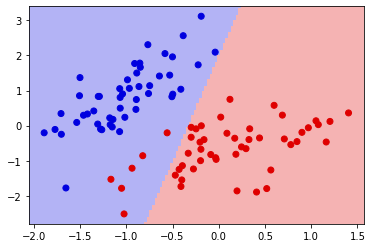

In [8]:
ml.plotClassify2D(learnerA,XA,YA)
plt.show()

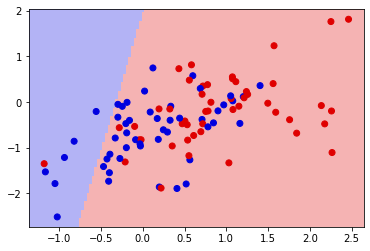

In [9]:
ml.plotClassify2D(learnerB,XB,YB)
plt.show()

## ...


Here is an example of latex equations that may be useful for expressing the gradient:

### 1.5 Gradient of NLL

Our negative log-likelihood loss is:
$$J_j(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$

Thus, its gradient is:
$$\nabla J_j(\theta) = (something)$$

### 1.6

Now define the train function and complete its missing code.

In [10]:
def myTrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    from IPython import display
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri = XX[i].dot(self.theta)     # TODO: compute linear response r(x)
            sig = 1/(1+np.exp(-ri))
            if YY[i]:
                gradi = -(1-sig)*XX[i,:]
            else:
                gradi = sig*XX[i,:]    # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = - sum_i [ (log si) if yi==1 else (log(1-si)) ]
        s = 1/(1+np.exp(-(XX.dot(self.theta))))
        Jsur = -np.mean(YY*np.log(s)+(1-YY)*np.log(1-s))
        Jnll.append(Jsur) # TODO evaluate the current NLL loss
        display.clear_output(wait=True);
        plt.subplot(1,2,1); plt.cla(); plt.plot(Jnll,'b-',J01,'r-'); # plot losses
        if N==2: plt.subplot(1,2,2); plt.cla(); self.plotBoundary(X,Y); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot        

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        if (epoch >= stopEpochs) or (epoch > 1 and abs(Jnll[-1]-Jnll[-2]) < stopTol):   # or if Jnll not changing between epochs ( < stopTol )
            done = True

### P1.7

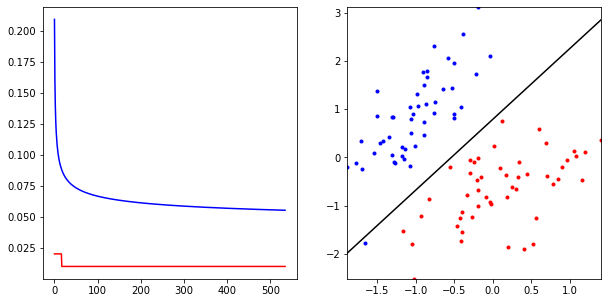

In [11]:
# Update our shell classifier definition
import logisticClassify2 as lc
class logisticClassify2(lc.logisticClassify2):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain

plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
    
learnerA = logisticClassify2()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);

I choose stopEpochs=1000 because this is the step size that makes my decision boundary look most correct.

Training error rate:  0.010101010101010102


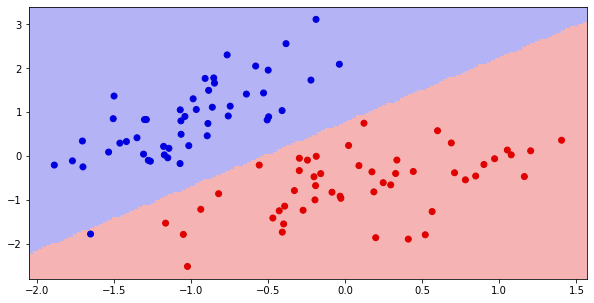

In [12]:
ml.plotClassify2D(learnerA,XA,YA)
print("Training error rate: ",learnerA.err(XA,YA))

plt.show()

I'm using the same step size above. Honestly, I don't think step size affect this dataset much, since its decision boundary is clearly not linear.

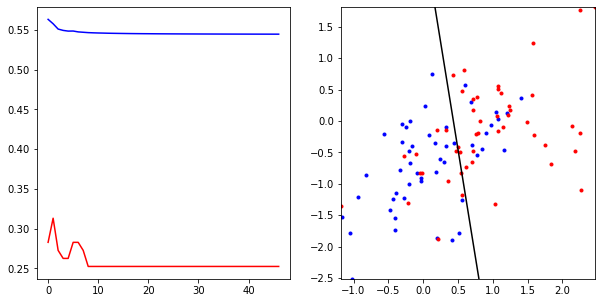

In [13]:
learnerB = logisticClassify2()
learnerB.theta = np.array([0.,0.,0.]);
learnerB.train(XB,YB,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);

Training error rate:  0.25252525252525254


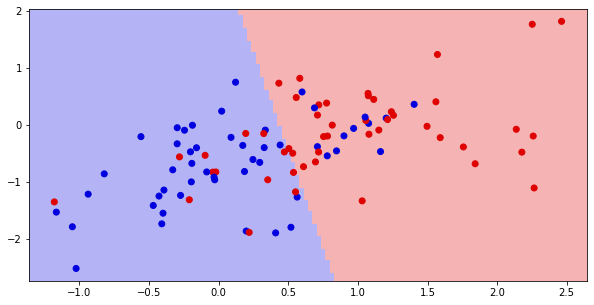

In [14]:
ml.plotClassify2D(learnerB,XB,YB)
print("Training error rate: ",learnerB.err(XB,YB))

plt.show()

## Problem 2

### 2.1

The graph will be a verticle line. It can shatter 1~2 points but not 3, as shown below. Therefore, its VC dimension is 2.
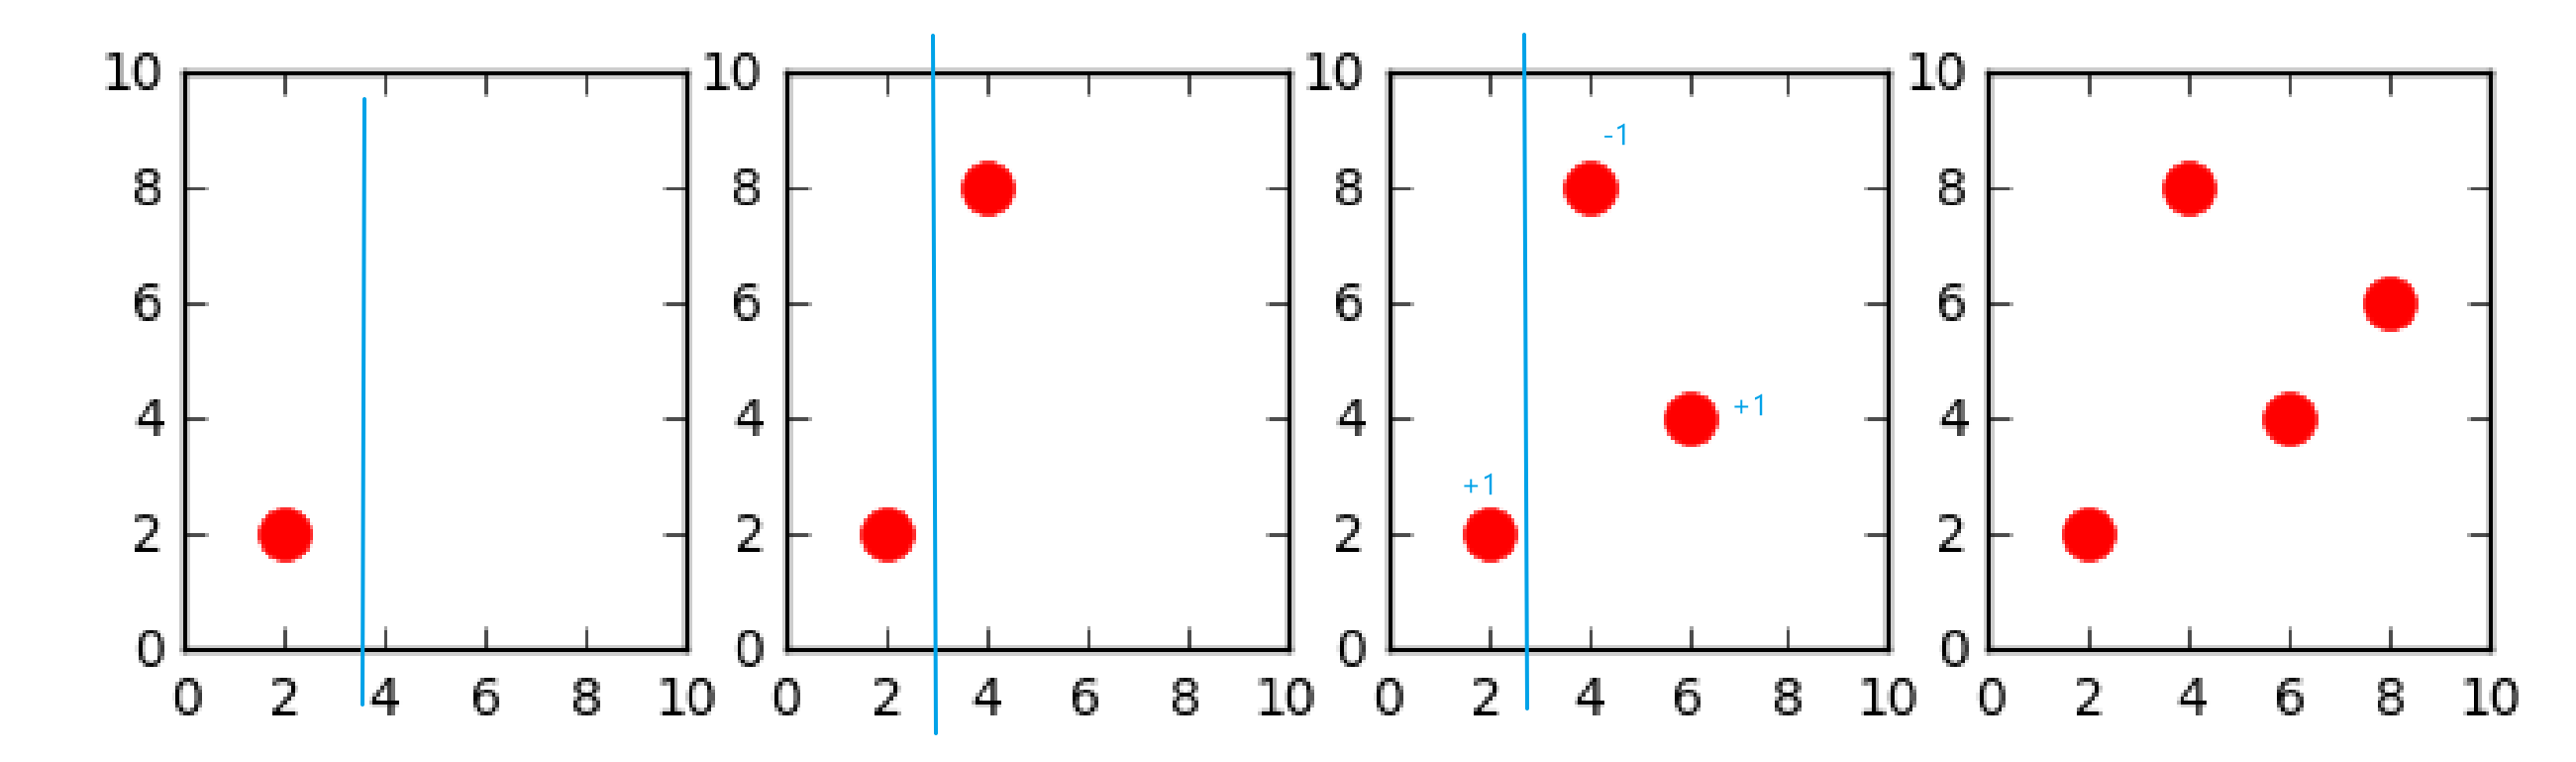

### 2.2

The graph will be linear and pass through the origin. It can shatter 1~2 points but not 3, as shown below. A line pass through the origin and (6,4) has a slope of 2/3; a line pass through the origin and (2,2) has a slope of 1; a line pass through the origin and (4,8) has a slope of 2. When (4,8) and (6,4) are -1 and (2,2) is +1, we need to draw a line that separates (2,2) and the others. But that is impossible because the slope of a line cannot smaller than 1 while  in between 1 and 2. Therefore, its VC dimension is 2.
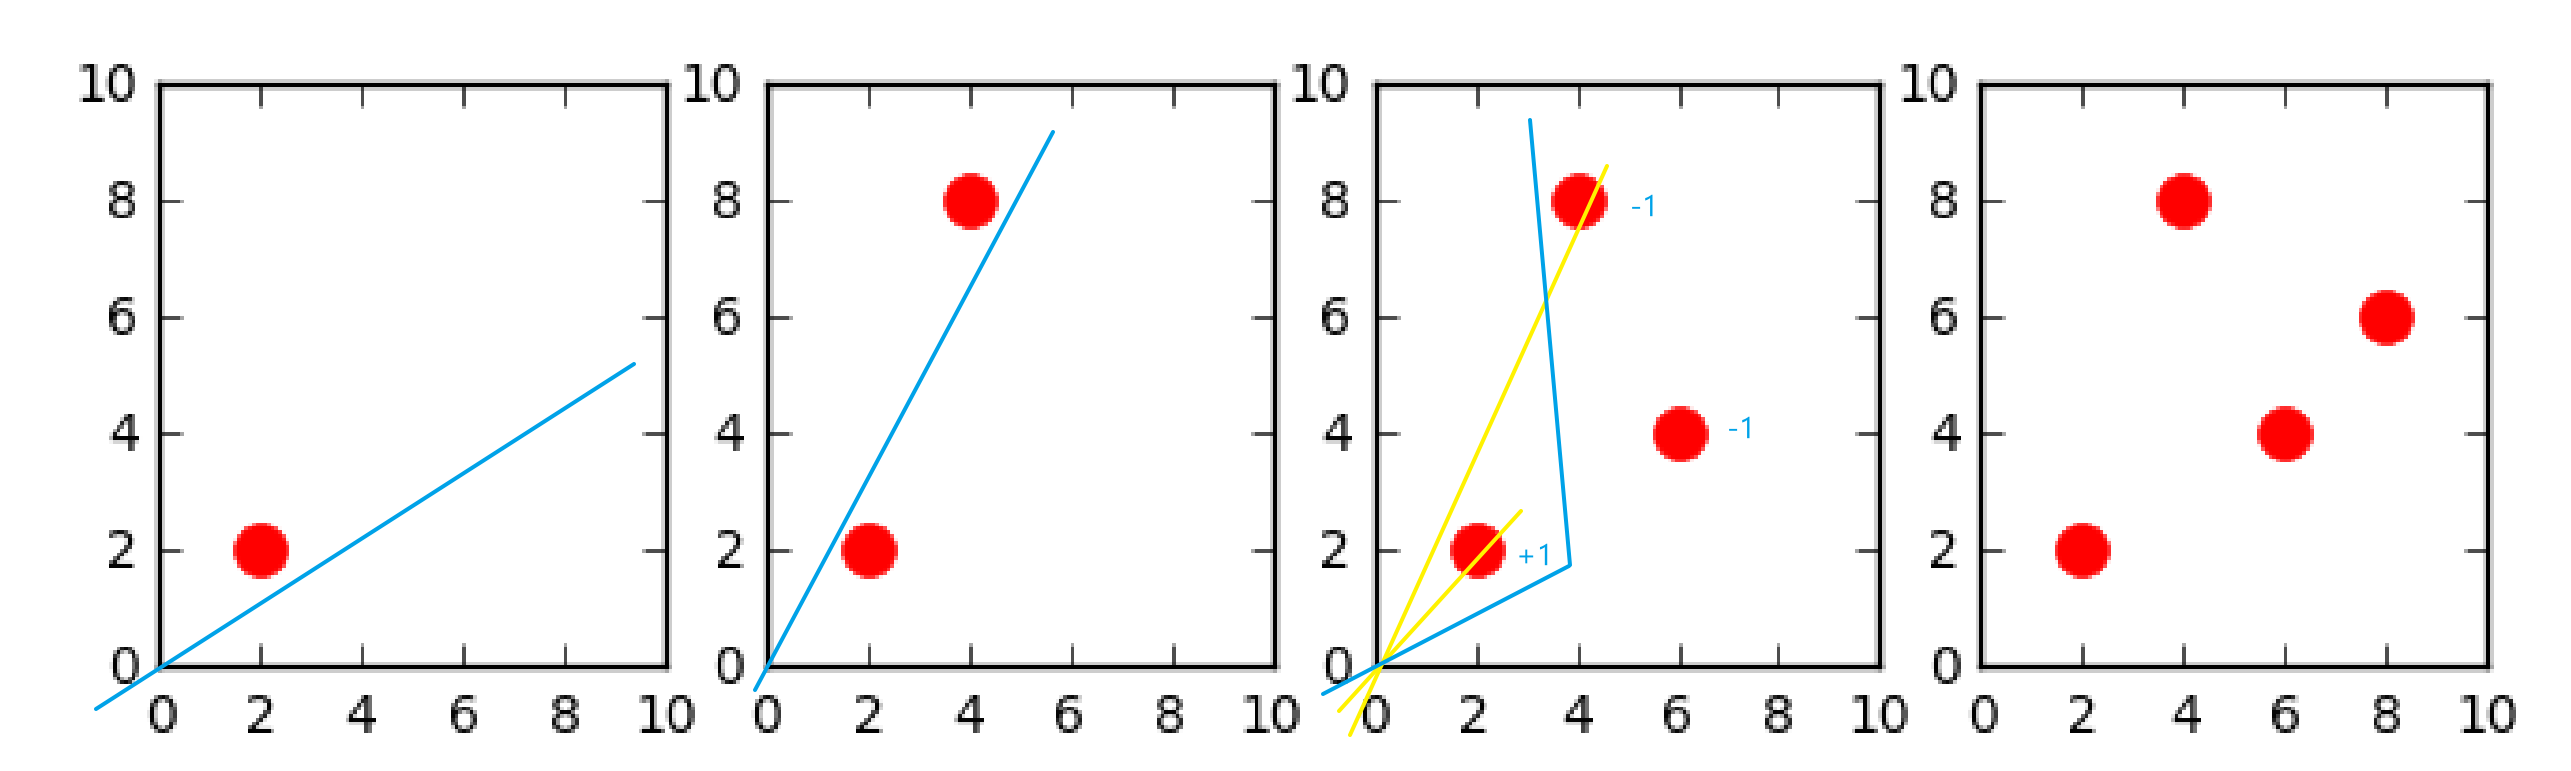

### 2.3
The graph will be a circle. It can shatter 1~3 points but not 4. As the case shown below, there will be intersections of decision boundaries, so it cannot shatter 4 points. Therefore, its VC dimension is 3.
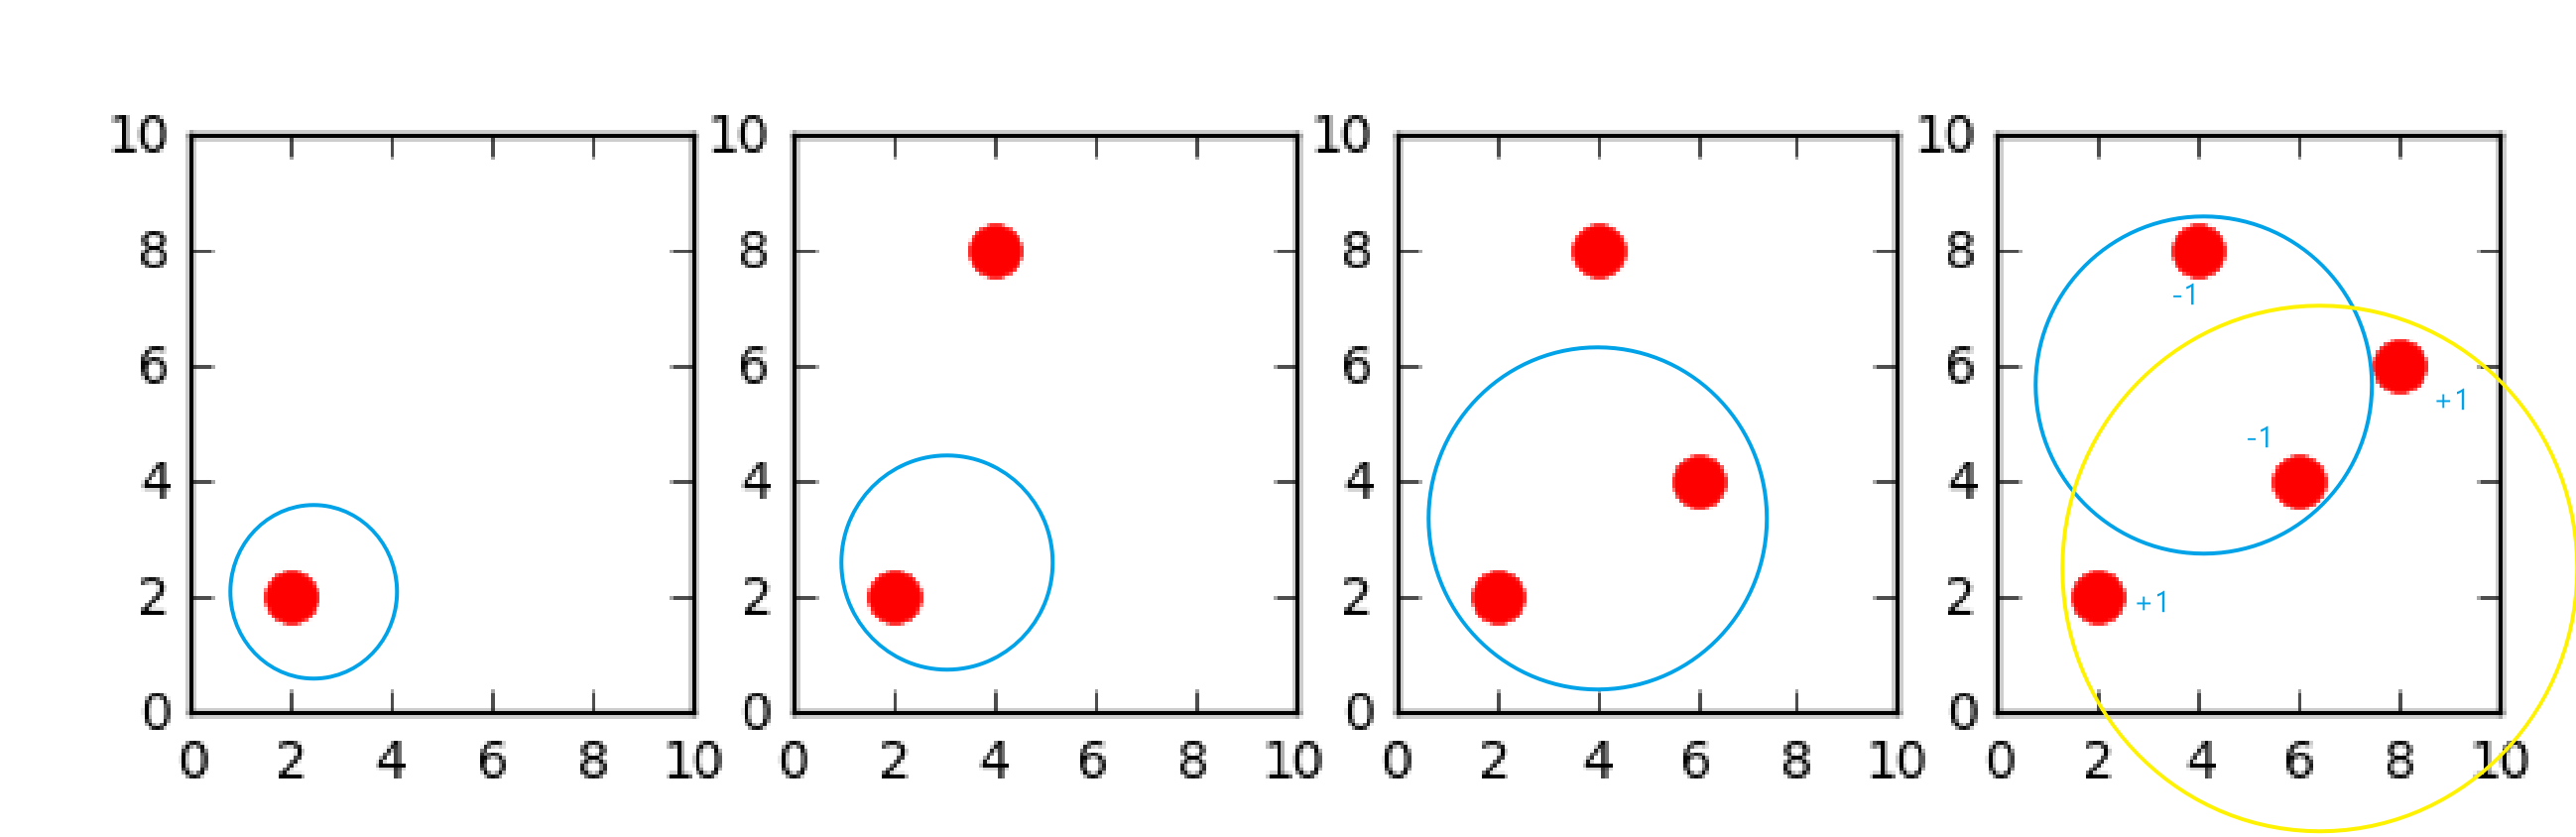

### 2.4
Since the graph is 2 parallel lines, it will be able to shatter 4 points. Therefore, its VC dimension is 4.

## Problem 3

For this homework, I rely mainly on the discussion code and piazza. I also go to one of the TA's office hour to ask for clarifications of concepts. I do not collaborate with any other students.

## Problem 4

You know I will say that I studied hard for the CS 178 homework and midterm during Halloween :)